**Check Point 2:** Utilize Grid Search ou Random Search para resolver o problema de Detecção de fraudes, utilizando o dataset: "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv". Treine um modelo com os melhores parâmetros encontrados e Plote um gráfico com as curvas dos erros de Treinamento, Validação e teste. Faça uma discussão sobre a performance do modelo de acordo com a sua análise do gráfico.

In [ ]:
# Importação de bibliotecas:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [ ]:
# Carregamento dos dados:
df = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv")

In [ ]:
# Exibição dos dados:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Separação de "features" e "alvo":
df['Class'].unique()
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Separação da tabela em amostras de treinamento e classe:
X, y = df.drop('Class', axis=1), df['Class']

In [ ]:
# Dividisão os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transformação de "y" em valores inteiros:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Teste exploratório da profundidade da árvore (max_depth):

Profundidade: 1
Acurácia de treino: 0.9991 | Recall de treino: 0.6802
Acurácia de teste:  0.9991 | Recall de teste:  0.7041
----------------------------------------
Profundidade: 2
Acurácia de treino: 0.9993 | Recall de treino: 0.7589
Acurácia de teste:  0.9992 | Recall de teste:  0.7245
----------------------------------------
Profundidade: 3
Acurácia de treino: 0.9994 | Recall de treino: 0.7208
Acurácia de teste:  0.9993 | Recall de teste:  0.6837
----------------------------------------
Profundidade: 4
Acurácia de treino: 0.9994 | Recall de treino: 0.8071
Acurácia de teste:  0.9994 | Recall de teste:  0.8163
----------------------------------------
Profundidade: 5
Acurácia de treino: 0.9996 | Recall de treino: 0.8096
Acurácia de teste:  0.9995 | Recall de teste:  0.7857
----------------------------------------
Profundidade: 6
Acurácia de treino: 0.9996 | Recall de treino: 0.8325
Acurácia de teste:  0.9995 | Recall de teste:  0.7959
----------------------------------------
Profundida

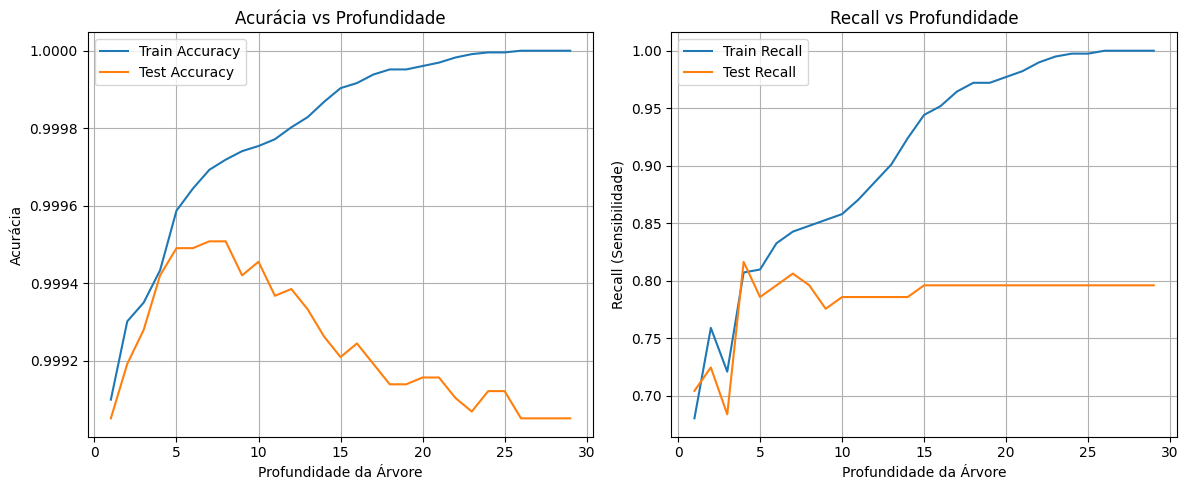

In [ ]:
# Importação de bibliotecas:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Inicializa listas para armazenar métricas de desempenho por profundidade:
acc_train = []
acc_test = []
rec_train = []
rec_test = []

# Loop para testando diferentes profundidades da árvore de decisão (de 1 até 29):
for i in range(1, 30):

    # Cria o classificador com profundidade máxima igual a "i":
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Treina o classificador com os dados de treino:
    dt.fit(X_train, y_train)

    # Realiza previsões para treino e teste:
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)

    # Calcula as métricas de acurácia e recall:
    acc_tr = accuracy_score(y_train, y_pred_train)
    acc_te = accuracy_score(y_test, y_pred_test)
    rec_tr = recall_score(y_train, y_pred_train)
    rec_te = recall_score(y_test, y_pred_test)

    # Exibe as métricas para cada profundidade testada:
    print(f"Profundidade: {i}")
    print(f"Acurácia de treino: {acc_tr:.4f} | Recall de treino: {rec_tr:.4f}")
    print(f"Acurácia de teste:  {acc_te:.4f} | Recall de teste:  {rec_te:.4f}")
    print("-" * 40)

    # Armazena os resultados para posterior plotagem:
    acc_train.append(acc_tr)
    acc_test.append(acc_te)
    rec_train.append(rec_tr)
    rec_test.append(rec_te)

# Cria o gráfico de Acurácia x Profundidade:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 30), acc_train, label='Train Accuracy')
plt.plot(range(1, 30), acc_test, label='Test Accuracy')
plt.xlabel("Profundidade da Árvore")
plt.ylabel("Acurácia")
plt.title("Acurácia vs Profundidade")
plt.legend()
plt.grid(True)

# Cria o gráfico de Recall x Profundidade:
plt.subplot(1, 2, 2)
plt.plot(range(1, 30), rec_train, label='Train Recall')
plt.plot(range(1, 30), rec_test, label='Test Recall')
plt.xlabel("Profundidade da Árvore")
plt.ylabel("Recall (Sensibilidade)")
plt.title("Recall vs Profundidade")
plt.legend()
plt.grid(True)

# Ajusta o layout e exibe os gráficos:
plt.tight_layout()
plt.show()


**Analise de Profundidade:**

A análise dos gráficos de Acurácia e Recall indicou que o melhor desempenho de recall de teste ocorreu na profundidade 4 (0,8163). A partir daí, o recall estabilizou ou caiu, enquanto a acurácia de treino seguiu aumentando, sinalizando início de overfitting.
Assim, limitamos o ajuste da profundidade entre 4 e 7 no GridSearchCV, buscando maximizar o recall sem perda de generalização.

 O Grid Search utilizando as profundidades entre 4 e 7 não foi concluído em mais de 1h30min de funcionamento, logo, para fins de praticidade e rapidez, a profundidade máxima no Grid Search foi alterada somente para 5 e 6.

 GridSearch_4_e_7.PNG

In [ ]:
# Importação de bibliotecas:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Instancia o classificador de árvore de decisão:
clf = DecisionTreeClassifier(random_state=42)

# Define o grid de hiperparâmetros para o ajuste:
param_grid = {
    'max_depth': [5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20, 50]
}

# Configura o GridSearchCV utilizando recall como métrica de avaliação:
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='recall', return_train_score=True) # Realiza o treinamento com validação cruzada
grid_search.fit(X_train, y_train)

# Obtém o melhor modelo encontrado:
best_model = grid_search.best_estimator_

# Realiza previsões no conjunto de teste usando o melhor modelo:
y_pred = best_model.predict(X_test)

# Avalia o modelo com a métrica de recall:
recall = recall_score(y_test, y_pred)

# Exibe o melhor recall e os melhores hiperparâmetros encontrados:
print("Melhor recall:", recall)
print("Melhores parâmetros:", grid_search.best_params_)

Melhor recall: 0.7959183673469388
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}


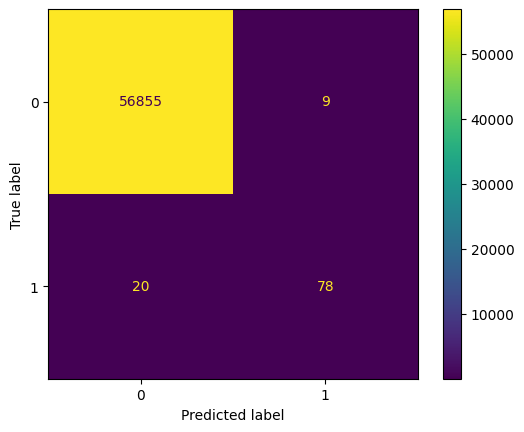

In [ ]:
# Importação de funções:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Geração da matriz de confusão utilizando as previsões do modelo:
cm = confusion_matrix(y_test, y_pred)

# Cria o objeto para exibir a matriz de confusão:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

# Exibe a matriz de confusão:
disp.plot()

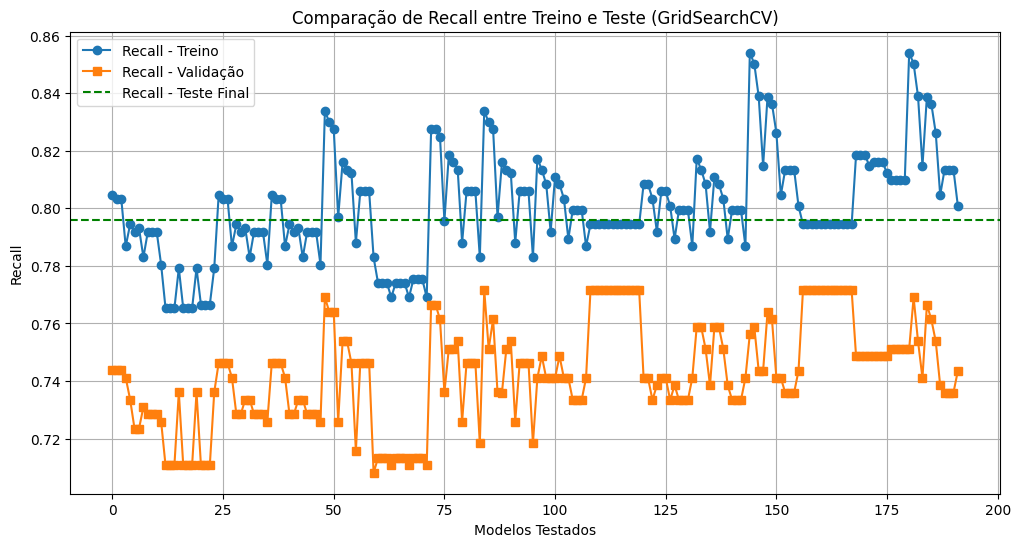

In [ ]:
# Importação de bibliotecas:
import matplotlib.pyplot as plt
import pandas as pd

# Obtenção dos resultados do processo de GridSearchCV:
results = grid_search.cv_results_

# Extração os valores médios de recall nos dados de treino e teste:
train_recalls = results['mean_train_score']
test_recalls = results['mean_test_score']
parametros = results['params'] # Hiperparâmetros testados em cada modelo

# Criação do gráfico comparando o recall no treino e no teste:
plt.figure(figsize=(12, 6))

plt.plot(range(len(train_recalls)), train_recalls, label='Recall - Treino', marker='o')
plt.plot(range(len(test_recalls)), test_recalls, label='Recall - Validação', marker='s')
plt.axhline(y=recall, color='green', linestyle='--', label='Recall - Teste Final')
plt.xlabel('Modelos Testados')
plt.ylabel('Recall')
plt.title('Comparação de Recall entre Treino e Teste (GridSearchCV)')
plt.legend()
plt.grid(True)
plt.show()

**Conclusão:**

O gráfico mostra como o recall variou nos dados de treino e validação ao longo dos modelos testados pelo GridSearchCV. É possível visualizar que muitos modelos tiveram recall alto no treino, mas perderam desempenho na validação — o que indica overfitting. O modelo final escolhido foi o que conseguiu manter um bom equilíbrio entre os dois, atingindo um recall validado de aproximadamente 0,7959.

Ao adicionar a linha com o recall do teste final no gráfico, foi evidenciada a generalização do modelo, reforçando que a validação cruzada funcionou como esperado e ajudando a evitar escolhas baseadas só no desempenho em treino.

No final, o modelo final conseguiu entregar um recall estável, com poucos falsos negativos e boa capacidade de generalização — o que é exatamente o que se espera em um sistema de detecção de fraudes.
